Warming up excersice.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/A.I./bank .csv")


object_columns = dataset.select_dtypes(include=['object']).columns
print("columns with dtypes:object:\n")
print(object_columns)

unique_values = dataset[object_columns].nunique()
print("\nunique values of those columns:\n")
print(unique_values)


print("null values:\n")
print(dataset.isnull().sum())
print("null values:\n")
print(dataset.isnull().sum())


numeric_data = dataset.drop(columns=object_columns)
print("\nNew DataFrame after dropping object columns:")
print(numeric_data.head())


numeric_data.to_csv('banknumericdata.csv', index=False)


numeric_data_reloaded = pd.read_csv('banknumericdata.csv')
print("\nSummary statistics of the numeric DataFrame:")
print(numeric_data_reloaded.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
columns with dtypes:object:

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

unique values of those columns:

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64
null values:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
null values:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays    

Problem 2 - Data Imputations

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/A.I./medical_students_dataset.csv"
medical_df = pd.read_csv(file_path)

missing_values = medical_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing_values)

"""For not being reason of outliers and for appropriate assumptions"""

for column in columns_with_missing_values.index:
    if medical_df[column].dtype == 'object':
        mode_value = medical_df[column].mode()[0]
        medical_df[column] = medical_df[column].fillna(mode_value)
        print(f"Filled missing values in column '{column}' with mode: {mode_value}")
    else:
        mean_value = medical_df[column].mean()
        medical_df[column] = medical_df[column].fillna(mean_value)
        print(f"Filled missing values in column '{column}' with mean: {mean_value}")

duplicates_count = medical_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

if duplicates_count > 0:
    medical_df.drop_duplicates(inplace=True)
    print(f"{duplicates_count} duplicate rows removed.")

missing_values_after_imputation = medical_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

cleaned_file_path = "cleaned_medical_student.csv"
medical_df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled missing values in column 'Student ID' with mean: 49974.042077777776
Filled missing values in column 'Age' with mean: 26.02156111111111
Filled missing values in column 'Gender' with mode: Male
Filled missing values in column 'Height' with mean: 174.9471026685741
Filled missing values in column 'Weight' with mean: 69.97158509186075
Filled missing values in column 'Blood Type' with mode: B
Filled missing values in column 'BMI' with mean: 23.338869359639226
Filled missing values in column 'Temperature' with m

3.2 Exercises - Data Cleaning and Transformations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/A.I./Titanic-Dataset.csv"
df = pd.read_csv(file_path)

columns_to_keep = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
subset_df = df[columns_to_keep]

first_class_df = subset_df[subset_df['Pclass'] == 1]
print(first_class_df)

fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female 

Problem - 2

In [ ]:
null_values_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_values_count}")

cleaned_df = first_class_df.dropna(subset=['Age'])
print("\nsuccessfully dropped rows with null age values\n")

print(cleaned_df)

Number of null values in the 'Age' column: 30

successfully dropped rows with null age values

                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                      

Problem - 3:

In [ ]:
embarked_distribution = df['Embarked'].value_counts()
print("Embarked distribution:\n", embarked_distribution)

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
print("successfully converted embarked col to sep binary cols")

titanic_df = pd.concat([df, embarked_dummies], axis=1)
print("successfully concatenated")

titanic_df = titanic_df.drop('Embarked', axis=1)
print("successfully dropped")

print(titanic_df.head())

Embarked distribution:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
successfully converted embarked col to sep binary cols
successfully concatenated
successfully dropped
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       Fals

Problem - 4:

Mean survival rates by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


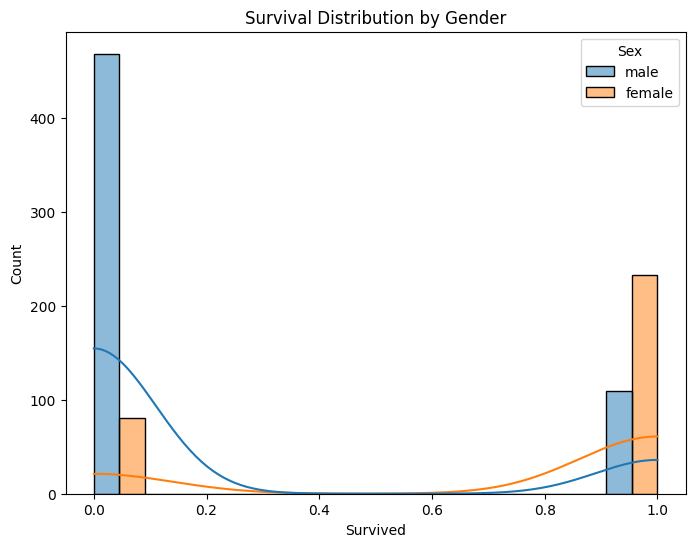

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:\n", mean_survival_by_gender)

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Survived', hue='Sex', kde=True, multiple="dodge")
plt.title('Survival Distribution by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Problem - 5:

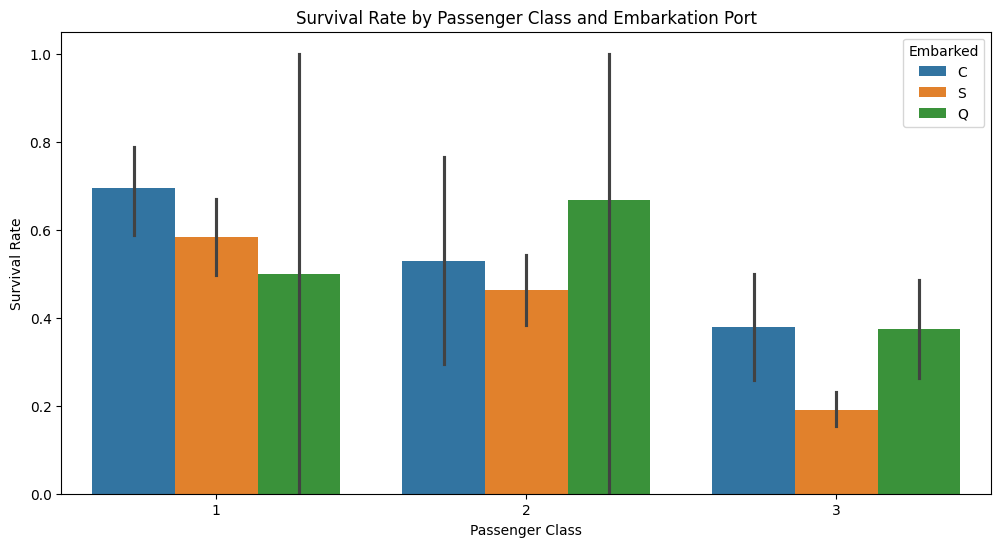

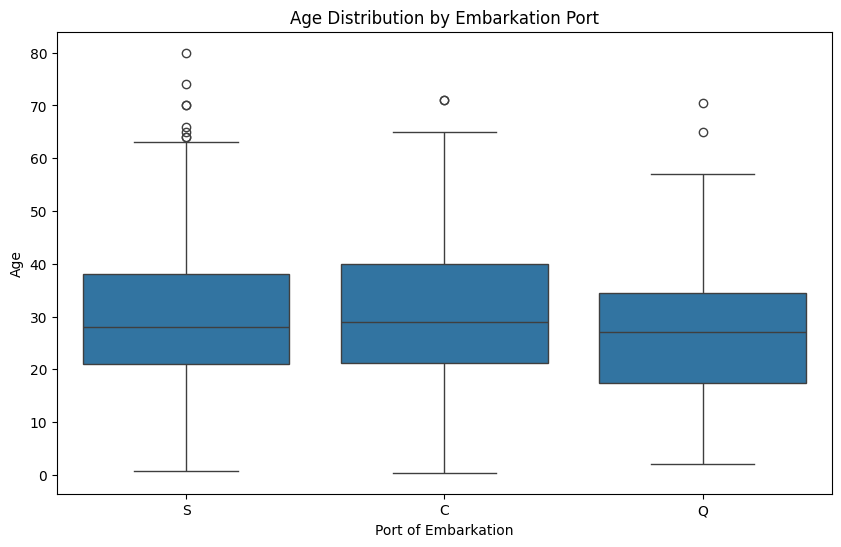

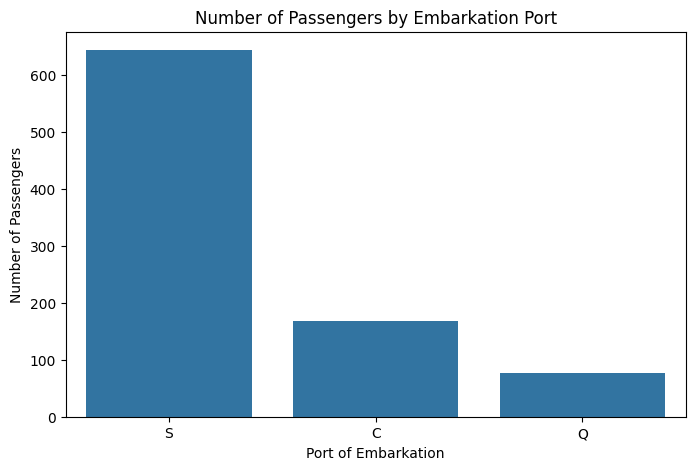

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Passenger Class and Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
print("\n")

# Alternative visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Age', data=df)
plt.title('Age Distribution by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Age')
plt.show()
print("\n")

# Another visualization option
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.show()

Problem - 6{Optional}:

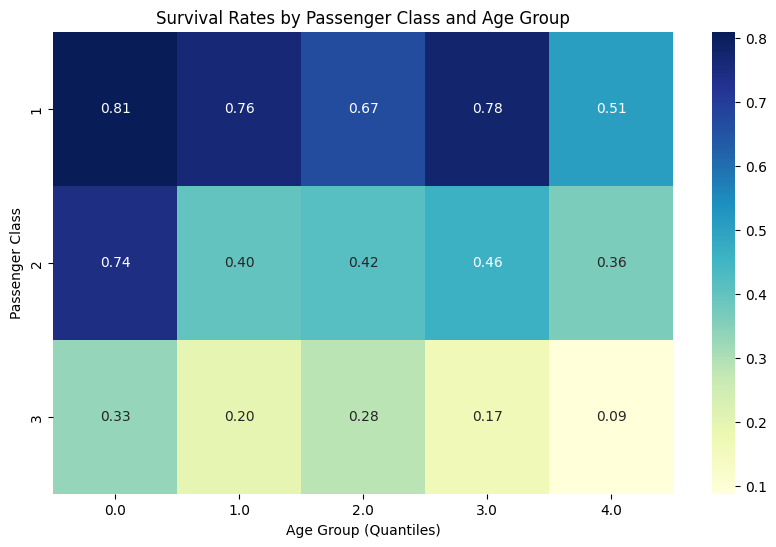

In [16]:
df['Age_Group'] = pd.qcut(df['Age'], 5, labels=False)

survival_rates = df.groupby(['Pclass', 'Age_Group'])['Survived'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rates by Passenger Class and Age Group')
plt.xlabel('Age Group (Quantiles)')
plt.ylabel('Passenger Class')
plt.show()